<a href="https://colab.research.google.com/github/mareosunder/Recyclable-Garbage-Classification/blob/main/Recyclable_Trash_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt # Plotting + Visualization
import numpy as np   # Numpy <--- Matrix, series()  image --> width, height, pixel(rgb) (0,255)
import PIL  # 
import tensorflow as tf  #Tensorflow --> Google, Pytorch --> Facebook

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import pathlib

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:

# dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
# data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
# data_dir = pathlib.Path(data_dir)

data_dir = '/content/drive/MyDrive/Soo Hyun/3rd Link Garbage Data/Garbage Classification/train'
data_dir = pathlib.Path(data_dir)

In [ ]:
print(list(data_dir.glob('*/')))

[PosixPath('/content/drive/MyDrive/Soo Hyun/3rd Link Garbage Data/Garbage Classification/train/plastic'), PosixPath('/content/drive/MyDrive/Soo Hyun/3rd Link Garbage Data/Garbage Classification/train/glass'), PosixPath('/content/drive/MyDrive/Soo Hyun/3rd Link Garbage Data/Garbage Classification/train/metal'), PosixPath('/content/drive/MyDrive/Soo Hyun/3rd Link Garbage Data/Garbage Classification/train/paper')]


In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

5030


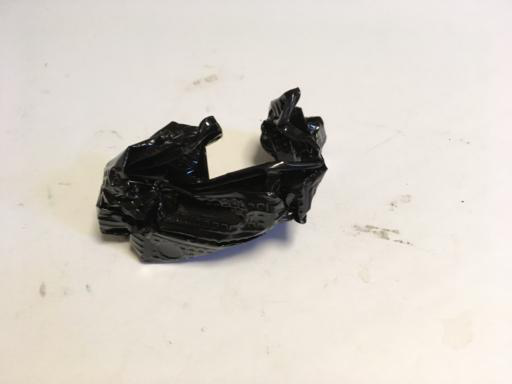

In [ ]:
plastic = list(data_dir.glob('plastic/*'))
PIL.Image.open(str(plastic[0]))

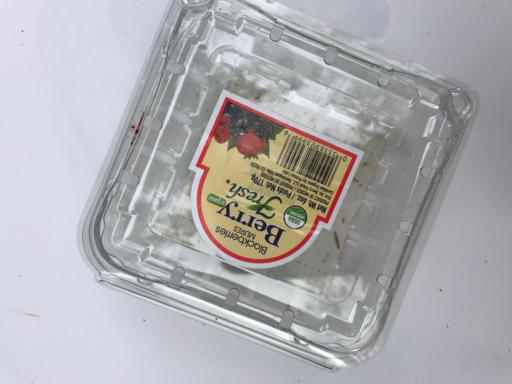

In [ ]:
PIL.Image.open(str(plastic[1]))

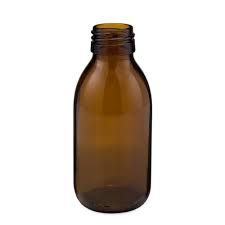

In [ ]:
glass = list(data_dir.glob('glass/*'))
PIL.Image.open(str(glass[0]))

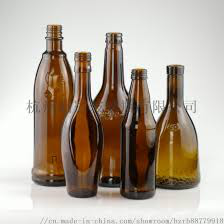

In [ ]:
PIL.Image.open(str(glass[1]))

In [ ]:
batch_size = 32
img_height = 224
img_width = 224

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 5030 files belonging to 4 classes.
Using 4024 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 5030 files belonging to 4 classes.
Using 1006 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['glass', 'metal', 'paper', 'plastic']


In [ ]:
# import matplotlib.pyplot as plt

# plt.figure(figsize=(10, 10))
# for images, labels in train_ds.take(1):
#   for i in range(9):
#     ax = plt.subplot(3, 3, i + 1)
#     plt.imshow(images[i].numpy().astype("uint8"))
#     plt.title(class_names[labels[i]])
#     plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 224, 224, 3)
(32,)


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
normalization_layer = layers.Rescaling(1./255)

In [ ]:
num_classes = len(class_names) 
# CNN : Convolutional Neural Network --> Images, Videos

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Model summary



In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        1

### Training the model

In [ ]:
epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
126/126 [==============================] - 115s 180ms/step - loss: 1.4579 - accuracy: 0.3802 - val_loss: 1.2356 - val_accuracy: 0.4672
Epoch 2/20
126/126 [==============================] - 2s 13ms/step - loss: 1.0707 - accuracy: 0.5562 - val_loss: 0.9386 - val_accuracy: 0.6412
Epoch 3/20
126/126 [==============================] - 2s 13ms/step - loss: 0.8647 - accuracy: 0.6561 - val_loss: 0.8675 - val_accuracy: 0.6551
Epoch 4/20
126/126 [==============================] - 2s 13ms/step - loss: 0.7005 - accuracy: 0.7239 - val_loss: 0.8486 - val_accuracy: 0.6750
Epoch 5/20
126/126 [==============================] - 2s 13ms/step - loss: 0.5430 - accuracy: 0.7955 - val_loss: 0.8592 - val_accuracy: 0.6700
Epoch 6/20
126/126 [==============================] - 2s 13ms/step - loss: 0.3875 - accuracy: 0.8670 - val_loss: 0.9687 - val_accuracy: 0.6819
Epoch 7/20
126/126 [==============================] - 2s 13ms/step - loss: 0.2613 - accuracy: 0.9038 - val_loss: 1.0127 - val_accuracy: 0.6

## Visualizing training results

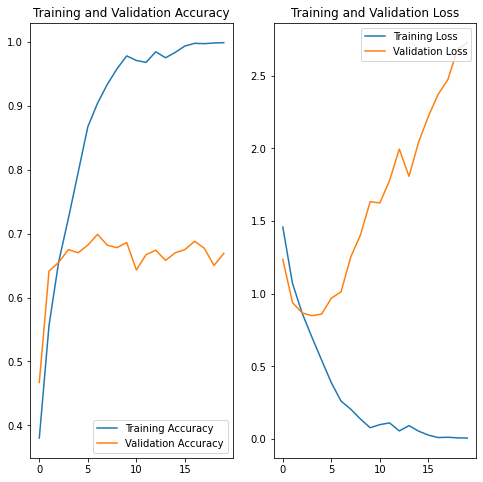

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Data augmentation

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.3),
    layers.RandomZoom(0.2),
  ]
)

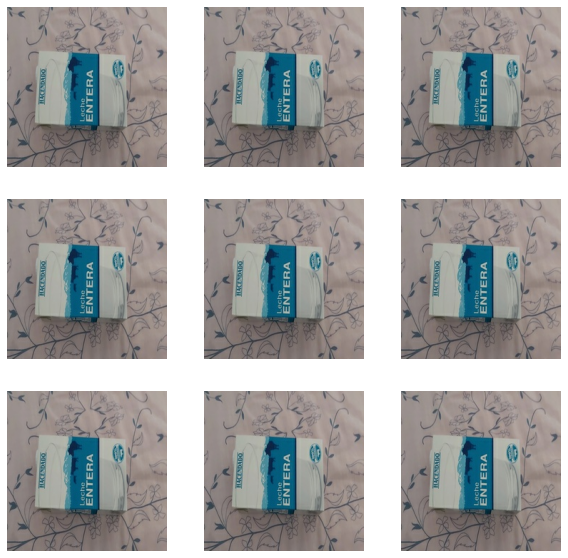

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

## Dropout



In [ ]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),

  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

## Compiling and training the model

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_10 (Sequential)  (None, 224, 224, 3)       0         
                                                                 
 rescaling_7 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_28 (Conv2D)          (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 112, 112, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 56, 56, 32)       0         
 g2D)                                                

In [ ]:
epochs = 35
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/35
126/126 [==============================] - 4s 27ms/step - loss: 1.3069 - accuracy: 0.4185 - val_loss: 1.0519 - val_accuracy: 0.5835
Epoch 2/35
126/126 [==============================] - 3s 26ms/step - loss: 1.0473 - accuracy: 0.5644 - val_loss: 0.9385 - val_accuracy: 0.6113
Epoch 3/35
126/126 [==============================] - 3s 26ms/step - loss: 1.0064 - accuracy: 0.5842 - val_loss: 0.9859 - val_accuracy: 0.6163
Epoch 4/35
126/126 [==============================] - 3s 26ms/step - loss: 0.9502 - accuracy: 0.6183 - val_loss: 0.8594 - val_accuracy: 0.6451
Epoch 5/35
126/126 [==============================] - 3s 26ms/step - loss: 0.8979 - accuracy: 0.6461 - val_loss: 0.8815 - val_accuracy: 0.6431
Epoch 6/35
126/126 [==============================] - 3s 26ms/step - loss: 0.8921 - accuracy: 0.6506 - val_loss: 0.8000 - val_accuracy: 0.6859
Epoch 7/35
126/126 [==============================] - 3s 25ms/step - loss: 0.8479 - accuracy: 0.6667 - val_loss: 0.8226 - val_accuracy: 0.6809

## Visualizing training results



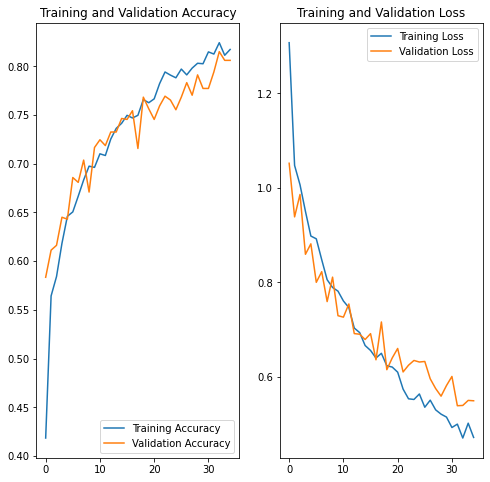

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
img = tf.keras.utils.load_img(
    '/content/drive/MyDrive/Soo Hyun/Garbage_Data_Test/plastic1.jpg', target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 129ms/step
This image most likely belongs to metal with a 86.71 percent confidence.
